# **Modelling most important features**

## Objectives

1. Create a model which determins house prices based on the most important features identified in the PriceCorrelationStudy notebook.
2. This can be based on the code generated in the ModellingAndEvaluation notebook.
3. Answers business criteria 2. Predict prices for client house data.
4. We have agreed an R2 score of at least 0.75 on the train set as well as on the test set.
5. Can predict house prices based on input data from streamlit dashboard. 

## Inputs

1. House_prices_records_clean.csv
2. Inherited_houses_clean.csv
3. Findings of feature engineering notebook
4. Most important features identified in the PriceCorrelationStudy notebook.

## Outputs

1. Data sets for train, validate and test sets.
2. Feature engineering pipeline.
3. Trained Model.
4. Predictions for client house prices and supporting data.

Please note that all code in this notebook is taken from The Code institute Data Analysis & Machine Learning Toolkit [Data Analysis & Machine Learning Toolkit](https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/) lesson.

## Comments

1. This process is necessary as we need a model which can predict house prices based off live data input into the streamlit dashboard. The model needs all features to be input to predict a house price. 
2. The present model needs 16 features to be provided. It will be a better user experience if we can create a model which needs fewer inputs.
3. We can use the most important features identified in the PriceCorrelationStudy notebook to create a model as accurate as one which uses more features.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing'

# Load data

Section 1 content

In [4]:
import numpy as np
import pandas as pd

house_prices_clean_df = pd.read_csv(f"outputs/datasets/clean_data/House_prices_records_clean.csv")
house_prices_clean_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


---

# Split data

We need to split the data into train, validation and test sets. We keep the same 7:1:2 ratio.

First we split the data into the train and test sets

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(
                                    house_prices_clean_df.drop(['SalePrice'],axis=1),
                                    house_prices_clean_df['SalePrice'],
                                    test_size=0.2,
                                    random_state=0
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (1168, 21) (1168,) 
* Test set: (292, 21) (292,)


We then split the train set further into train and validation sets.

In [6]:
X_train, X_val,y_train, y_val = train_test_split(
                                    X_train,
                                    y_train,
                                    test_size=0.2,
                                    random_state=0
                                    )

print("* Train set:", X_train.shape, y_train.shape)
print("* Validation set:",  X_val.shape, y_val.shape)
print("* Test set:",   X_test.shape, y_test.shape)

* Train set: (934, 21) (934,)
* Validation set: (234, 21) (234,)
* Test set: (292, 21) (292,)


And save the data

In [7]:
import os

try:
  os.makedirs(name='outputs/datasets/most_important_features_data')
except Exception as e:
  print(e)

X_train.to_csv(f"outputs/datasets/most_important_features_data/X_train.csv",index=False)
X_val.to_csv(f"outputs/datasets/most_important_features_data/X_val.csv",index=False)
X_test.to_csv(f"outputs/datasets/most_important_features_data/X_test.csv",index=False)
y_train.to_csv(f"outputs/datasets/most_important_features_data/y_train.csv",index=False)
y_val.to_csv(f"outputs/datasets/most_important_features_data/y_val.csv",index=False)
y_test.to_csv(f"outputs/datasets/most_important_features_data/y_test.csv",index=False)


---

## Pipeline.

We can use the same pipeline as we used in the Modelling and Evaluation notebook, excepting that we can remove all features except 'GarageArea', 'GrLivArea', 'KitchenQual', 'OverallQual', 'TotalBsmtSF'.

In [8]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
from feature_engine.encoding import OrdinalEncoder
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler



pipeline = Pipeline([
    ('drop_features', DropFeatures(features_to_drop = ['1stFlrSF',
                                                        '2ndFlrSF',
                                                        'GarageYrBlt',
                                                        'YearBuilt',
                                                        'BsmtExposure',
                                                        'BsmtFinType1',
                                                        'GarageFinish',
                                                        'BedroomAbvGr',
                                                        'BsmtFinSF1',
                                                        'BsmtUnfSF',
                                                        'LotArea',
                                                        'LotFrontage',
                                                        'MasVnrArea',
                                                        'OpenPorchSF',
                                                        'OverallCond',
                                                        'YearRemodAdd']) ),

    ("OrdinalCategoricalEncoder",OrdinalEncoder(encoding_method='arbitrary', 
                                                  variables = ['KitchenQual'] ) ),

    ('pt', vt.PowerTransformer(variables = ['GarageArea', 'GrLivArea', 'OverallQual','TotalBsmtSF']) ),

    ('winsorizer_iqr', Winsorizer(capping_method='iqr', fold=1.5, tail='both')),
    
    ( "feat_scaling",StandardScaler() )
  ])

And use the pipeline to firt the train, validation and test sets.

In [9]:
X_train = pipeline.fit_transform(X_train)
X_val= pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

---

# The Model

In [10]:
import os;
import tensorflow as tf;
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2';
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_tf_model(n_features):

  model = Sequential()
  model.add(Dense(units=n_features, activation='relu', input_shape=(n_features,)))

  model.add(Dense(units=512,activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(units=512,activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(units=512,activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(units=512,activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(units=1))
  model.compile(loss='mse', optimizer='adam')
  
  return model

In [11]:
model = create_tf_model(n_features=X_train.shape[1])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3072      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [13]:
model = create_tf_model(n_features=X_train.shape[1])

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_val, y_val),
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
30/30 [==============================] - 1s 15ms/step - loss: 39019552768.0000 - val_loss: 35372556288.0000
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 22378219520.0000 - val_loss: 8443380224.0000
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 4536938496.0000 - val_loss: 3276409856.0000
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 2990596864.0000 - val_loss: 2375397632.0000
Epoch 5/100
30/30 [==============================] - 0s 10ms/step - loss: 2442847744.0000 - val_loss: 1989444608.0000
Epoch 6/100
30/30 [==============================] - 0s 10ms/step - loss: 2237386240.0000 - val_loss: 1663811200.0000
Epoch 7/100
30/30 [==============================] - 0s 8ms/step - loss: 1919566976.0000 - val_loss: 1443708800.0000
Epoch 8/100
30/30 [==============================] - 0s 8ms/step - loss: 1714591360.0000 - val_loss: 1295418496.0000
Epoch 9/100
30/30 [==============================] - 0s 10

---

# Evaluation

In [14]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,3.901955e+10,3.537256e+10
1,2.237822e+10,8.443380e+09
2,4.536938e+09,3.276410e+09
3,2.990597e+09,2.375398e+09
4,2.442848e+09,1.989445e+09
...,...,...
83,1.319878e+09,1.076735e+09
84,1.250301e+09,7.647158e+08
85,1.192548e+09,7.704109e+08
86,1.220260e+09,7.677569e+08


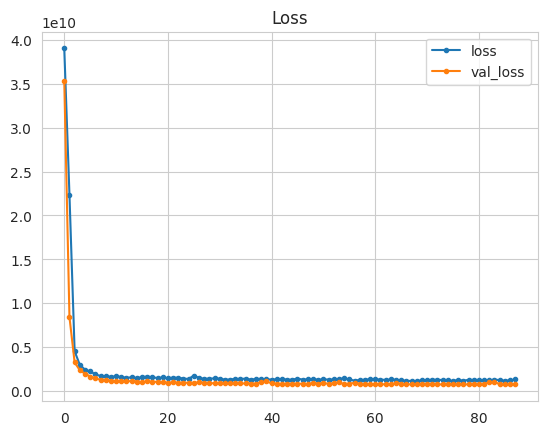

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.show()

In [16]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 802us/step - loss: 1518571392.0000


1518571392.0

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import numpy as np

def regression_performance(X_train, y_train,
                           X_val, y_val,
                           X_test, y_test,pipeline):

  print("Model Evaluation \n")
  print("* Train Set")
  regression_evaluation(X_train,y_train,pipeline)
  print("* Validation Set")
  regression_evaluation(X_val, y_val,pipeline)
  print("* Test Set")
  regression_evaluation(X_test,y_test,pipeline)



def regression_evaluation(X,y,pipeline):
  """
  # Gets features and target (either from train or test set) and pipeline
  - it predicts using the pipeline and the features
  - calculates performance metrics comparing the prediction to the target
  """
  prediction = pipeline.predict(X)
  print('R2 Score:', r2_score(y, prediction).round(3))  
  print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))  
  print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))  
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
  print("\n")

  

def regression_evaluation_plots(X_train, y_train,
                                X_val, y_val,
                                X_test, y_test,
                                pipeline, alpha_scatter=0.5):

  pred_train = pipeline.predict(X_train).reshape(-1) 
  # we reshape the prediction arrays to be in the format (n_rows,), so we can plot it after
  pred_val = pipeline.predict(X_val).reshape(-1)
  pred_test = pipeline.predict(X_test).reshape(-1)

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
  sns.scatterplot(x=y_train , y=pred_train, alpha=alpha_scatter, ax=axes[0])
  sns.lineplot(x=y_train , y=y_train, color='red', ax=axes[0])
  axes[0].set_xlabel("Actual")
  axes[0].set_ylabel("Predictions")
  axes[0].set_title("Train Set")

  sns.scatterplot(x=y_val , y=pred_val, alpha=alpha_scatter, ax=axes[1])
  sns.lineplot(x=y_val , y=y_val, color='red', ax=axes[1])
  axes[1].set_xlabel("Actual")
  axes[1].set_ylabel("Predictions")
  axes[1].set_title("Validation Set")

  sns.scatterplot(x=y_test , y=pred_test, alpha=alpha_scatter, ax=axes[2])
  sns.lineplot(x=y_test , y=y_test, color='red', ax=axes[2])
  axes[2].set_xlabel("Actual")
  axes[2].set_ylabel("Predictions")
  axes[2].set_title("Test Set")

  plt.show()
  train_valid_test = fig

Model Evaluation 

* Train Set
R2 Score: 0.838
Mean Absolute Error: 21032.483
Mean Squared Error: 1024455730.94
Root Mean Squared Error: 32007.12


* Validation Set
R2 Score: 0.861
Mean Absolute Error: 20305.975
Mean Squared Error: 764240464.143
Root Mean Squared Error: 27644.899


* Test Set
R2 Score: 0.78
Mean Absolute Error: 22693.494
Mean Squared Error: 1518571368.562
Root Mean Squared Error: 38968.851




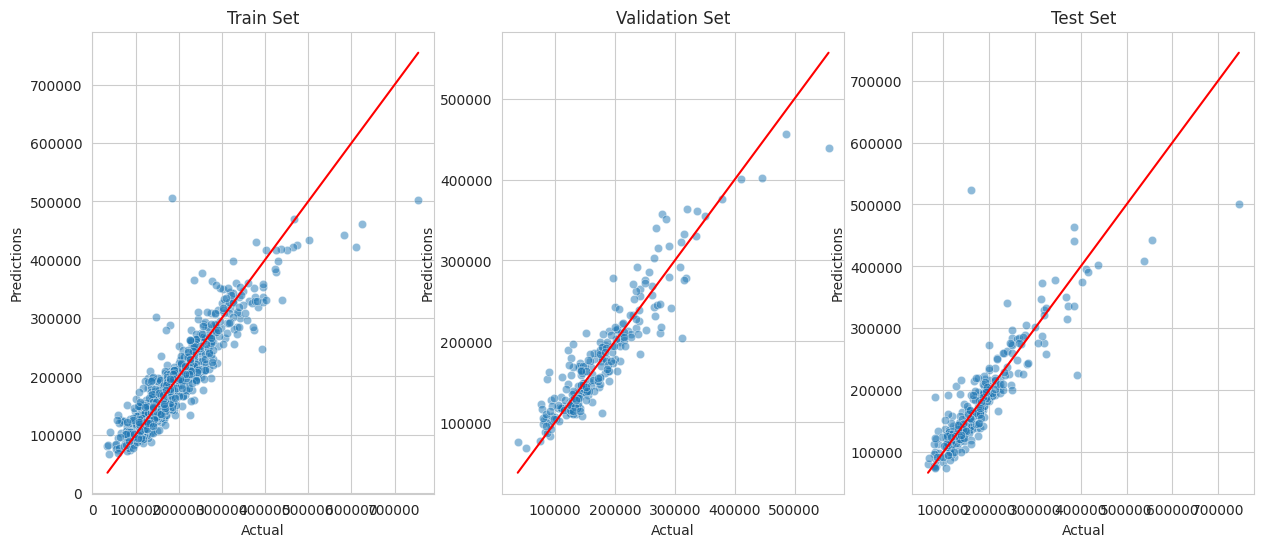

In [18]:
regression_performance(X_train, y_train,X_val, y_val, X_test, y_test,model)
regression_evaluation_plots(X_train, y_train, X_val, y_val,X_test, y_test, 
                            model, alpha_scatter=0.5)

# Observations

1. Excepting the input layer (which must have the same number of units as the number of input features), or model is identicle to before.
2. We have met out train, validation and test sets exceed the R2 target of 0.75

Save the pipleine

In [19]:
import joblib
import os

try:
  os.makedirs(name= f'outputs/pipeline_2/')
except Exception as e:
  print(e)

joblib.dump(value=pipeline, filename=f"outputs/pipeline_2/pipeline_2.pkl")

['outputs/pipeline_2/pipeline_2.pkl']

Save the model

In [26]:
try:
  os.makedirs(name= f'outputs/model_2/')
except Exception as e:
  print(e)

model.save('outputs/model_2/house_price_predictor_model_2.h5')

---

# Predict inherited house prices.

1. We can use our new model to predict prices of the houses in the inherited data set.

In [21]:
inherited_houses_clean_df = pd.read_csv(f"outputs/datasets/clean_data/Inherited_houses_clean.csv")
inherited_houses_clean_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,730.0,Unf,1961.0,...,TA,11622,80.0,0.0,0,6,5,882.0,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,312.0,Unf,1958.0,...,Gd,14267,81.0,108.0,36,6,6,1329.0,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,482.0,Fin,1997.0,...,TA,13830,74.0,0.0,34,5,5,928.0,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,470.0,Fin,1998.0,...,Gd,9978,78.0,20.0,36,6,6,926.0,1998,1998


Run the data through the pipeline.

In [22]:
engineered_client_house_prices = pipeline.transform(inherited_houses_clean_df)

Use the model to predict house prices.

In [23]:
predictions = model.predict(engineered_client_house_prices)
predictions_df = pd.DataFrame(predictions)

house_price_predictions = pd.concat([inherited_houses_clean_df, predictions_df], axis=1)
house_price_predictions

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,0
0,896,0,2,No,468.0,Rec,270.0,730.0,Unf,1961.0,...,11622,80.0,0.0,0,6,5,882.0,1961,1961,142228.296875
1,1329,0,3,No,923.0,ALQ,406.0,312.0,Unf,1958.0,...,14267,81.0,108.0,36,6,6,1329.0,1958,1958,169058.468750
2,928,701,3,No,791.0,GLQ,137.0,482.0,Fin,1997.0,...,13830,74.0,0.0,34,5,5,928.0,1997,1998,142941.203125
3,926,678,3,No,602.0,GLQ,324.0,470.0,Fin,1998.0,...,9978,78.0,20.0,36,6,6,926.0,1998,1998,180540.640625


We note the price predictions differ from our the predictions from our earlier model.

In [25]:
import os
try:
  os.makedirs(name='outputs/datasets/predicted_prices_2')
except Exception as e:
  print(e)

house_price_predictions.to_csv(f"outputs/datasets/predicted_prices_2/house_price_predictions_2.csv",index=False)